# Covid-19 in the Philippines

Data as of March 12, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the four CSVs into one data frame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220312 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220312 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220312 - 04 Case Information_batch_2.csv', "DOH COVID Data Drop_ 20220312 - 04 Case Information_batch_3.csv"]), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670172,C18737879,62.0,60 to 64,MALE,2022-03-09,2022-03-09,2022-03-12,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF MAKATI,PH137602000,SAN LORENZO,PH137602025,MILD,NO,NaN,NaN,NaN
3670173,C81252313,83.0,80+,MALE,2022-03-09,2022-03-09,2022-03-12,NaN,NaN,NaN,NaN,NCR,NCR,CALOOCAN CITY,PH137501000,BARANGAY 172,PH137501172,MILD,NO,2022-03-07,NaN,NaN
3670174,C93321375,37.0,35 to 39,FEMALE,2022-03-09,2022-03-10,2022-03-12,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF VALENZUELA,PH137504000,KARUHATAN,PH137504008,MILD,NO,NaN,NO,NaN
3670175,C1561375,54.0,50 to 54,MALE,2022-03-10,2022-03-10,2022-03-12,NaN,NaN,NaN,NaN,NCR,NCR,QUEZON CITY,PH137404000,BATASAN HILLS,PH137404139,MILD,NO,NaN,NaN,NaN


We basically combined all four CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [3]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [4]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

In [5]:
df['CityMunRes'] = df['CityMunRes'].str.capitalize()
df['ProvRes'] = df['ProvRes'].str.capitalize()

# Cleaning the data

## Looking for duplicates

Look for potential duplicates through the all columns. **True** means there are duplicates **across all columns.**

In [6]:
df.duplicated().value_counts()

False    3670177
dtype: int64

**No duplicated records** found in the report.

DOH, in its daily case reports, continuously clean the data and regularly reports and removes duplicates.

In the meantime, we will be **keeping the duplicates** for the purpose of our analysis. We are confident that because duplicates account for less than 1% of the total, it won't affect the overall Covid-19 picture.

In [7]:
#df[df.duplicated(keep='first')].sort_values('Age')
#This supposedly shows the duplicated entries arranged by 'Age'. Remember, these entries are checked similar
#across all columns in at least another entry. They are just arranged by age.

## Handling NaN values

There are also issues with **NaNs** which means there was no data input. One issue I stumbled upon quite belatedly was the fact that **'CaseCode'** indicator actually has a lot of null values (see below).

In [8]:
df.CaseCode.isna().value_counts()

False    3670176
True           1
Name: CaseCode, dtype: int64

One NaN detected as of this latest update. This means we can easily **resample** the cases (with the lone NaN not being included).

Previously though, there were over **60,000** null values under **CaseCode** which prompted us to use other columns (**Sex**) to analyze. Below we see however that the Sex column now has more NaNs.

In [9]:
df.Sex.isna().value_counts()

False    3670133
True          44
Name: Sex, dtype: int64

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [10]:
cases = df.resample('D', on='DateRepConf').CaseCode.count().to_frame().reset_index()
cases.tail()

,DateRepConf,CaseCode
768,2022-03-08,435
769,2022-03-09,568
770,2022-03-10,587
771,2022-03-11,597
772,2022-03-12,655


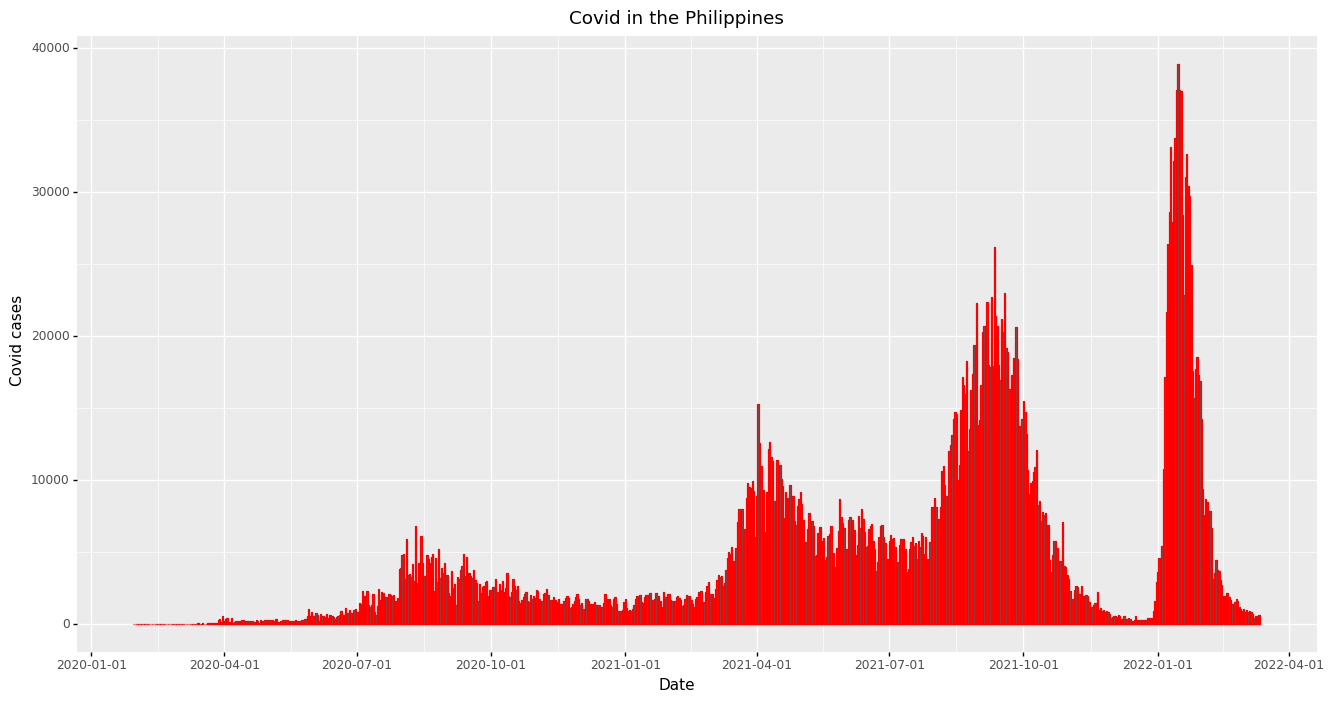

<ggplot: (355539596)>

In [11]:
(
    ggplot(cases, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [12]:
df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().round().tail(20)

DateRepConf
2022-02-21    2676.0
2022-02-22    2523.0
2022-02-23    2378.0
2022-02-24    2182.0
2022-02-25    2029.0
2022-02-26    1850.0
2022-02-27    1707.0
2022-02-28    1579.0
2022-03-01    1515.0
2022-03-02    1434.0
2022-03-03    1350.0
2022-03-04    1254.0
2022-03-05    1186.0
2022-03-06    1127.0
2022-03-07    1080.0
2022-03-08    1041.0
2022-03-09     974.0
2022-03-10     894.0
2022-03-11     820.0
2022-03-12     782.0
Freq: D, Name: CaseCode, dtype: float64

In [13]:
case_roll = df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().to_frame().reset_index()
case_roll.tail(10)

,DateRepConf,CaseCode
763,2022-03-03,1350.357143
764,2022-03-04,1253.785714
765,2022-03-05,1185.714286
766,2022-03-06,1127.357143
767,2022-03-07,1080.071429
768,2022-03-08,1040.928571
769,2022-03-09,974.214286
770,2022-03-10,894.142857
771,2022-03-11,820.214286
772,2022-03-12,782.214286


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:381: PlotnineWarning: position_stack : Removed 13 rows containing missing values.


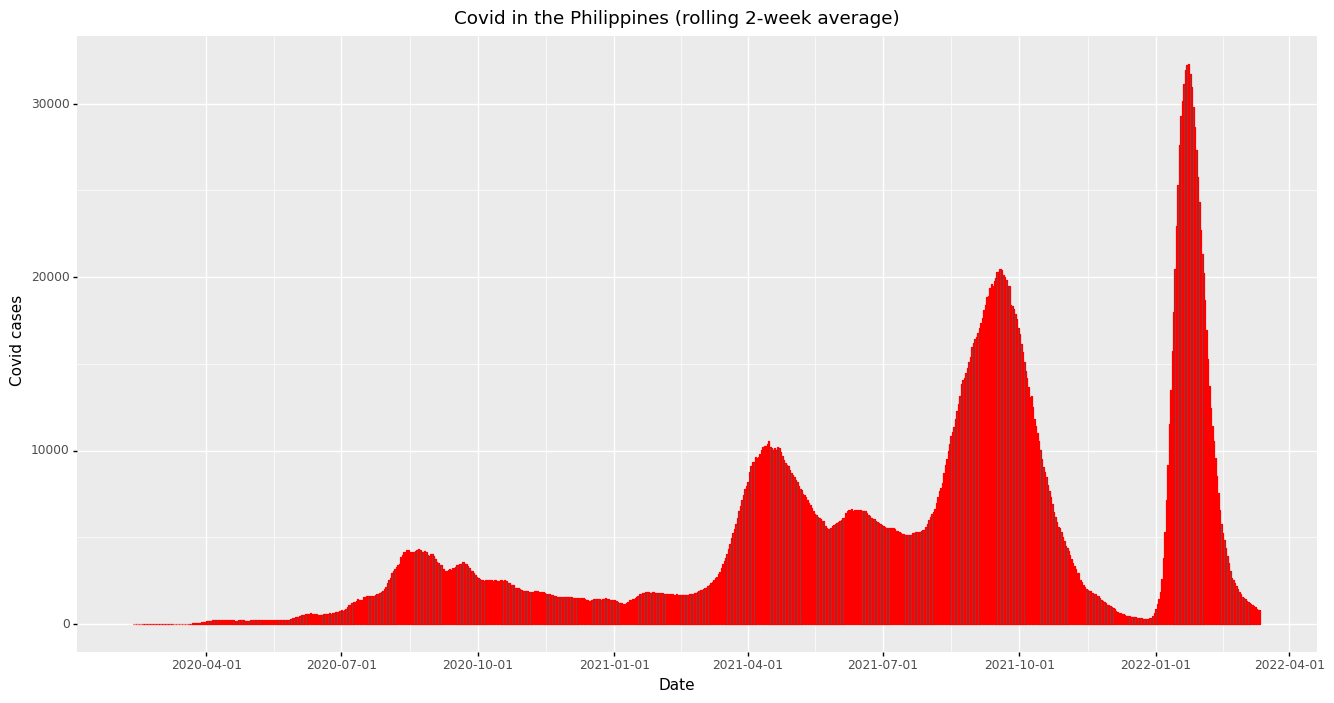

<ggplot: (355584040)>

In [14]:
(
    ggplot(case_roll, aes('DateRepConf', 'CaseCode')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines (rolling 2-week average)")
)

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [15]:
df.resample('D', on='DateOnset').CaseCode.count().tail(10)

DateOnset
2022-03-01    156
2022-03-02    156
2022-03-03    141
2022-03-04    144
2022-03-05    115
2022-03-06     86
2022-03-07    107
2022-03-08    104
2022-03-09     64
2022-03-10     15
Name: CaseCode, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [16]:
df.resample('D', on='DateSpecimen').CaseCode.count().tail(10)

DateSpecimen
2022-03-01    643
2022-03-02    777
2022-03-03    737
2022-03-04    717
2022-03-05    536
2022-03-06    397
2022-03-07    641
2022-03-08    606
2022-03-09    499
2022-03-10    193
Name: CaseCode, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [17]:
df[df.HealthStatus=="RECOVERED"].resample('D', on='DateRepConf').size().tail(10)

DateRepConf
2022-03-03    642
2022-03-04    189
2022-03-05    102
2022-03-06     59
2022-03-07     16
2022-03-08      8
2022-03-09     33
2022-03-10     21
2022-03-11     14
2022-03-12     34
Freq: D, dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [18]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2022-02-28    13
2022-03-01    22
2022-03-02    12
2022-03-03    16
2022-03-04    16
2022-03-05    14
2022-03-06    17
2022-03-07     9
2022-03-08     6
2022-03-09     2
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [19]:
df.RegionRes.value_counts(dropna=False)
#ROF stands for returning overseas Filipinos
#Over 3,400 (0.11%) have no indicated regional location.

NCR                               1167029
Region IV-A: CALABARZON            653549
Region III: Central Luzon          360418
Region VI: Western Visayas         193503
Region VII: Central Visayas        192222
Region II: Cagayan Valley          162003
Region XI: Davao Region            139981
Region I: Ilocos Region            133330
CAR                                118968
Region X: Northern Mindanao        105741
Region XII: SOCCSKSARGEN            75109
Region V: Bicol Region              65624
Region IX: Zamboanga Peninsula      65601
Region VIII: Eastern Visayas        64212
CARAGA                              61730
Region IV-B: MIMAROPA               43883
ROF                                 38145
BARMM                               25748
NaN                                  3381
Name: RegionRes, dtype: int64

Interpretation: Half of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [20]:
df.ProvRes.value_counts(dropna=False).head(12)
#Over 47,000 (1.3%) have no information into provincial location.

Ncr                  1161285
Cavite                217287
Laguna                163734
Rizal                 141360
Cebu                  138918
Bulacan               136011
Batangas               92865
Davao del sur          89451
Pampanga               88060
Iloilo                 79273
Negros occidental      71420
Benguet                69575
Name: ProvRes, dtype: int64

# Which municipalities?

In [21]:
df.CityMunRes.value_counts(dropna=False).head(15)
#Over 55,000 (about 1.5%) people infected have no information on their municipal location.

Quezon city            243654
City of manila         146585
City of pasig           84574
Taguig city             83287
Caloocan city           82918
City of makati          82583
Davao city              74677
City of parañaque       70487
NaN                     57973
Cebu city (capital)     55872
Pasay city              52089
City of las piñas       50463
City of valenzuela      49298
City of mandaluyong     47576
Baguio city             42007
Name: CityMunRes, dtype: int64

Interpretation: Six cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

### Wide data (pivot table)

In [22]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_prov.head(10)

ProvRes,DateRepConf,Abra,Agusan del norte,Agusan del sur,Aklan,Albay,Antique,Apayao,Aurora,Basilan,Bataan,Batanes,Batangas,Benguet,Biliran,Bohol,Bukidnon,Bulacan,Cagayan,Camarines norte,Camarines sur,Camiguin,Capiz,Catanduanes,Cavite,Cebu,City of isabela (not a province),Cotabato (north cotabato),Cotabato city (not a province),Davao de oro,Davao del norte,Davao del sur,Davao occidental,Davao oriental,Dinagat islands,Eastern samar,Guimaras,Ifugao,Ilocos norte,Ilocos sur,Iloilo,Isabela,Kalinga,La union,Laguna,Lanao del norte,Lanao del sur,Leyte,Maguindanao,Marinduque,Masbate,Misamis occidental,Misamis oriental,Mountain province,Ncr,Negros occidental,Negros oriental,Northern samar,Nueva ecija,Nueva vizcaya,Occidental mindoro,Oriental mindoro,Palawan,Pampanga,Pangasinan,Quezon,Quirino,Rizal,Romblon,Samar (western samar),Sarangani,Siquijor,Sorsogon,South cotabato,Southern leyte,Sultan kudarat,Sulu,Surigao del norte,Surigao del sur,Tarlac,Tawi-tawi,Zambales,Zamboanga del norte,Zamboanga del sur,Zamboanga sibugay
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0
8,2020-03-11,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Long data

We create a **new dataframe** for plotnine later. Long data is always preferred when processing using plotnine.

In [23]:
df_prov2 = pd.melt(df_prov, id_vars=['DateRepConf'], value_name='CaseCode', var_name='province').sort_values('province')

In [24]:
df_prov2.CaseCode = df_prov2.CaseCode.astype(int)
df_prov2

,DateRepConf,province,CaseCode
0,2020-01-30,Abra,0
488,2021-07-04,Abra,0
489,2021-07-05,Abra,37
490,2021-07-06,Abra,0
491,2021-07-07,Abra,0
...,...,...,...
61668,2020-11-06,Zamboanga sibugay,5
61669,2020-11-07,Zamboanga sibugay,1
61670,2020-11-08,Zamboanga sibugay,0
61661,2020-10-30,Zamboanga sibugay,1


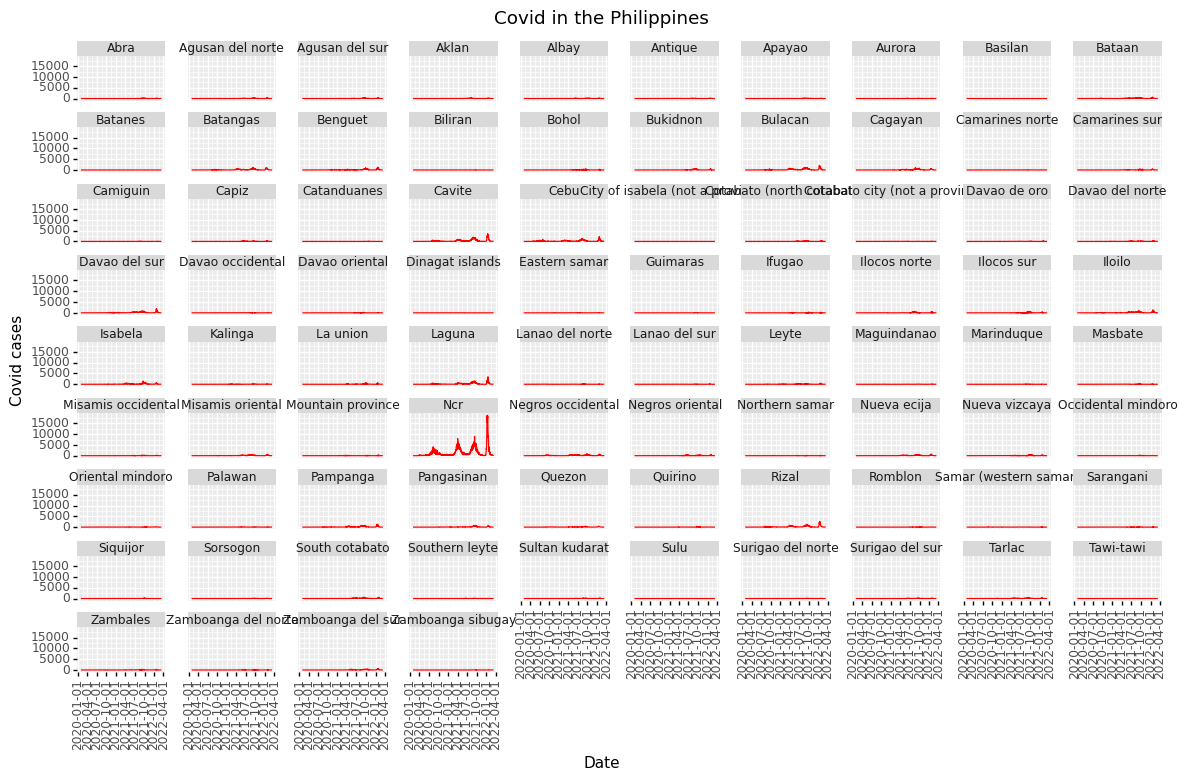

<ggplot: (355617165)>

In [25]:
#Plotnine chart
(
    ggplot(df_prov2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red") +
           theme(figure_size=(14,8)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)

# Track cases per day region

### Wide data 

Similar with provincial data. We have to go through this process to be able to extract **long data** since we would have to fill some null values.

In [26]:
df_reg = df.pivot_table(columns="RegionRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False).reset_index()
df_reg.head(10)

RegionRes,DateRepConf,BARMM,CAR,CARAGA,NCR,ROF,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region IX: Zamboanga Peninsula,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN
0,2020-01-30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
1,2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
2,2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,0,0,2.0,0,0,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0
5,2020-03-08,0,0,0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-03-09,0,0,0,11.0,1.0,0,0,1.0,1.0,0,0,0,0,0,0,0,0,0
7,2020-03-10,0,0,0,7.0,0,0,0,1.0,0,0,0,1.0,0,0,0,0,0,0
8,2020-03-11,0,0,0,13.0,1.0,0,0,0,1.0,0,0,0,0,1.0,0,0,0,0
9,2020-03-12,0,0,0,2.0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0


### Long data

We create a new data frame solely for regional data only for processing later with plotnine for charts.

In [27]:
df_reg2 = pd.melt(df_reg, id_vars=['DateRepConf'], value_name='CaseCode', var_name='province').sort_values('province')
df_reg2.CaseCode = df_reg2.CaseCode.astype(int)
df_reg2

,DateRepConf,province,CaseCode
0,2020-01-30,BARMM,0
488,2021-07-04,BARMM,41
489,2021-07-05,BARMM,27
490,2021-07-06,BARMM,47
491,2021-07-07,BARMM,29
...,...,...,...
12828,2020-11-06,Region XII: SOCCSKSARGEN,26
12829,2020-11-07,Region XII: SOCCSKSARGEN,50
12830,2020-11-08,Region XII: SOCCSKSARGEN,69
12821,2020-10-30,Region XII: SOCCSKSARGEN,43


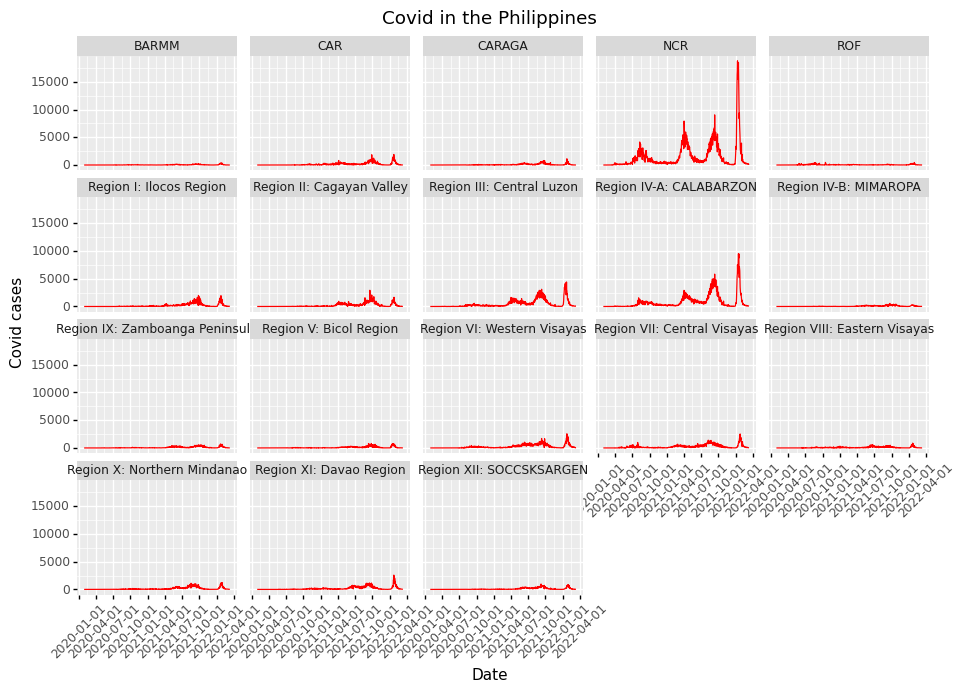

<ggplot: (356593313)>

In [28]:
plt=(
    ggplot(df_reg2, aes('DateRepConf', 'CaseCode')) +
           geom_line(color="red", stat="identity") +
           theme(figure_size=(11,7)) +
           facet_wrap('province') +
           theme(subplots_adjust={'wspace': 0.08}, axis_text_x=element_text(rotation=45)) +
           labs(x= "Date", y="Covid cases", title="Covid in the Philippines")
)
plt
#ggsave(plt, "covid.svg")

# By municipality

This is quite heavy and would need some extensive data cleaning because of some municipalities with the same names. Remove the hashtags to run.

In [29]:
#df_munc = df.CityMunRes.value_counts().sort_index()
#df_munc = df.groupby("ProvRes").CityMunRes.value_counts().sort_index()
#df_munc

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [30]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-03-03    204
2022-03-04    183
2022-03-05    230
2022-03-06    220
2022-03-07    180
2022-03-08    160
2022-03-09    137
2022-03-10    183
2022-03-11    151
2022-03-12    205
Freq: D, Name: CaseCode, dtype: int64

In [31]:
#Example for municipalities
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2022-03-03    44
2022-03-04    23
2022-03-05    39
2022-03-06    32
2022-03-07    28
2022-03-08    24
2022-03-09    28
2022-03-10    25
2022-03-11    30
2022-03-12    34
Freq: D, Name: CaseCode, dtype: int64

<AxesSubplot:title={'center':'QC cases'}, xlabel='DateRepConf'>

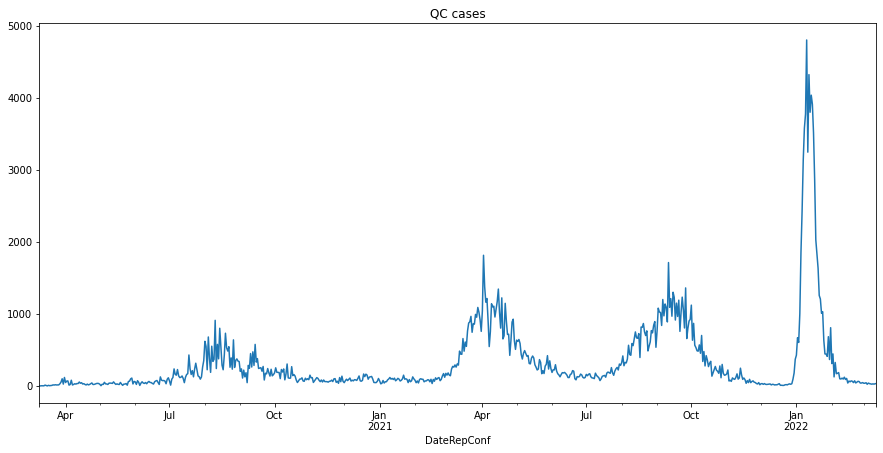

In [32]:
#Not plotnine but can be made one if made into a single df.
df[df.CityMunRes=="Quezon city"].resample('D', on='DateRepConf').CaseCode.count().plot(title="QC cases", figsize = (15, 7))

# How young/old are the infected?

In [33]:
df.AgeGroup.value_counts(normalize=True, dropna=False)*100
#0.1% of people infected did not indicate age.

25 to 29    14.495786
30 to 34    12.918614
20 to 24    10.215665
35 to 39     9.894400
40 to 44     8.380849
45 to 49     6.864710
50 to 54     6.300977
55 to 59     5.564963
60 to 64     4.413820
15 to 19     4.282110
65 to 69     3.304364
10 to 14     2.949040
70 to 74     2.408194
0 to 4       2.368687
5 to 9       2.309698
80+          1.790568
75 to 79     1.458486
NaN          0.079070
Name: AgeGroup, dtype: float64

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [34]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    51.009556
MALE      48.989245
NaN        0.001199
Name: Sex, dtype: float64

In [35]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    2341036
NO     1208377
YES     120764
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [36]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220312 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144074,Zamboanga del Sur Medical Center PCR Laboratory,2022-03-07,48.0,4.0,4.0,2.0,2.0,0.0,0.0,2379.0,0.0,38377,38002,11364,26638,0.30,0.70,NaN
144075,Zamboanga del Sur Medical Center PCR Laboratory,2022-03-08,48.0,15.0,15.0,0.0,15.0,0.0,0.0,2314.0,0.0,38392,38017,11364,26653,0.30,0.70,NaN
144076,Zamboanga del Sur Medical Center PCR Laboratory,2022-03-09,48.0,10.0,10.0,1.0,9.0,0.0,0.0,2314.0,0.0,38402,38027,11365,26662,0.30,0.70,NaN
144077,Zamboanga del Sur Medical Center PCR Laboratory,2022-03-10,48.0,18.0,18.0,2.0,16.0,0.0,0.0,2286.0,0.0,38420,38045,11367,26678,0.30,0.70,NaN


# Transform dates to datetime format

In [37]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Look for null values

Again, nulls are not counted when resampling.

In [38]:
df_test.daily_output_unique_individuals.isna().value_counts()

False    133027
True      11052
Name: daily_output_unique_individuals, dtype: int64

**Interpretation**: Over 10,700 null values, meaning there was no information provided.

In [39]:
df_test.daily_output_samples_tested.isna().value_counts()
#Same with samples.

False    133025
True      11054
Name: daily_output_samples_tested, dtype: int64

# Total number of people tested for Covid-19 daily

In [40]:
#Creating a new data frame for processing with plotnine
daily_test = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().to_frame().reset_index()
daily_test.tail(12)
#shows last 12 days.

,report_date,daily_output_unique_individuals
696,2022-02-28,24207.0
697,2022-03-01,27330.0
698,2022-03-02,25845.0
699,2022-03-03,26965.0
700,2022-03-04,24639.0
701,2022-03-05,21690.0
702,2022-03-06,17217.0
703,2022-03-07,22776.0
704,2022-03-08,25107.0
705,2022-03-09,24445.0


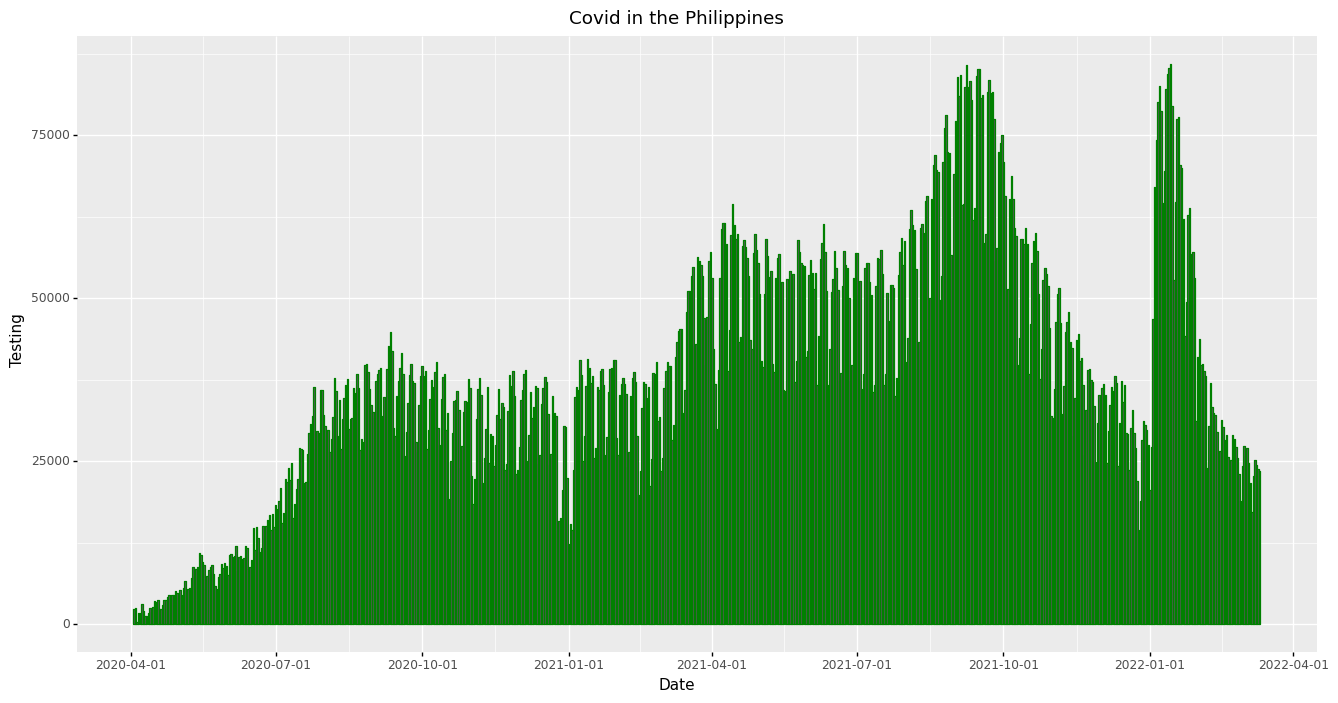

<ggplot: (359446363)>

In [41]:
#Plotnine chart
(
    ggplot(daily_test, aes('report_date', 'daily_output_unique_individuals')) +
           geom_col(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Covid in the Philippines")
)

Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

Shows last 15 days.

In [42]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().tail(15)

report_date
2022-02-25    27407.0
2022-02-26    24027.0
2022-02-27    19606.0
2022-02-28    25469.0
2022-03-01    29277.0
2022-03-02    27418.0
2022-03-03    27845.0
2022-03-04    26417.0
2022-03-05    22964.0
2022-03-06    17862.0
2022-03-07    23727.0
2022-03-08    26191.0
2022-03-09    25667.0
2022-03-10    25379.0
2022-03-11    24888.0
Freq: D, Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

Shows last 10 days.

In [43]:
test_roll = df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().to_frame().reset_index()
test_roll.tail(10)

,report_date,daily_output_unique_individuals
698,2022-03-02,25520.0
699,2022-03-03,25425.0
700,2022-03-04,25109.0
701,2022-03-05,24830.0
702,2022-03-06,24653.0
703,2022-03-07,24481.0
704,2022-03-08,24202.0
705,2022-03-09,23918.0
706,2022-03-10,23682.0
707,2022-03-11,23546.0


/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 13 rows containing missing values.


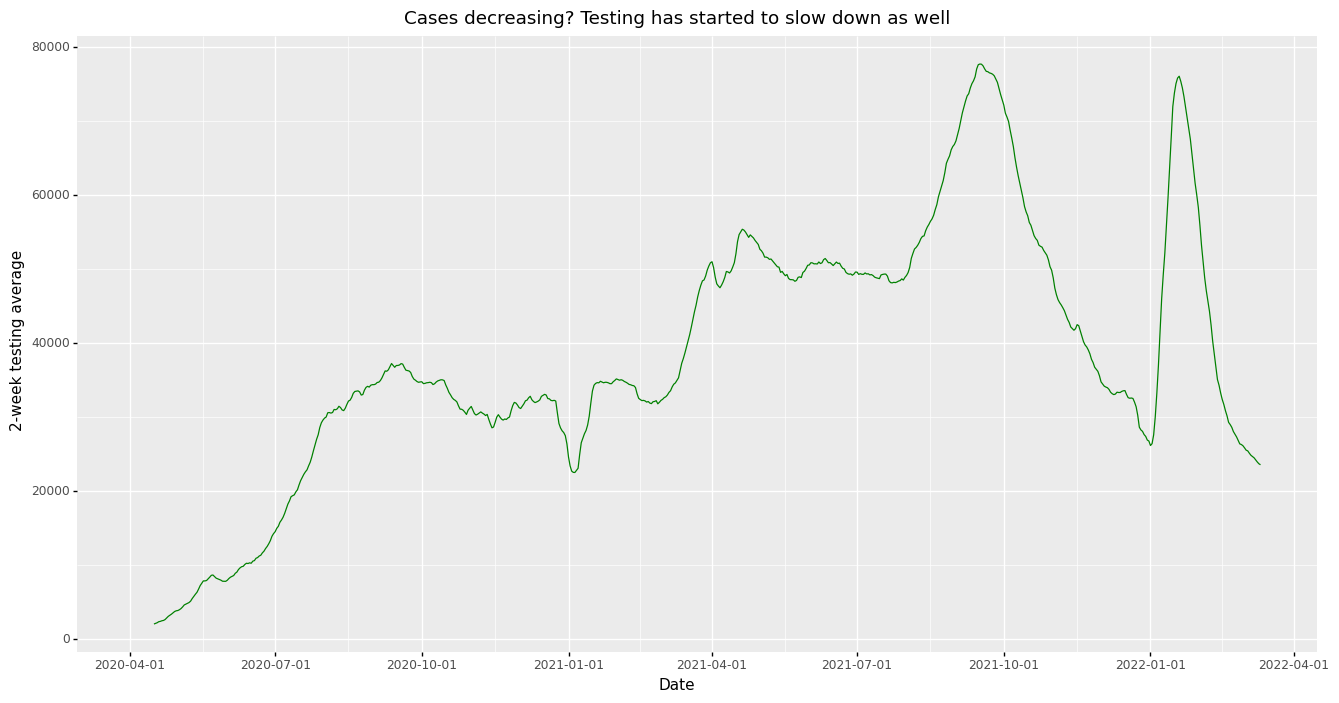

<ggplot: (359439297)>

In [44]:
(
    ggplot(test_roll, aes('report_date', 'daily_output_unique_individuals')) +
           geom_line(color="green", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="2-week testing average", title="Cases decreasing? Testing has started to slow down as well")
)

# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [45]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2022-01-31    1963559.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1377892.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1014680.0
2021-12-31     943242.0
2020-12-31     929690.0
2021-02-28     907116.0
2020-11-30     894039.0
2022-02-28     831321.0
2020-07-31     768793.0
2020-06-30     360407.0
2022-03-31     263393.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

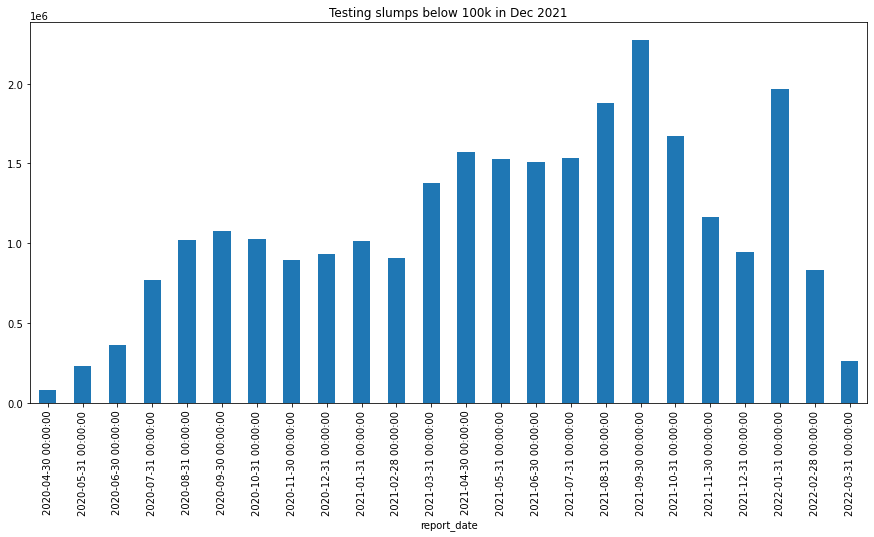

In [46]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 15

### Cumulative

In [47]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)

facility_name
Detoxicare Molecular Diagnostics Laboratory                               181071.0
Philippine Red Cross - Port Area                                          176902.0
Philippine Red Cross (PRC)                                                101178.0
Baguio General Hospital and Medical Center                                 87343.0
Research Institute for Tropical Medicine (RITM)                            78012.0
Jose B. Lingad Memorial General Hospital                                   73218.0
Philippine Red Cross Logistics & Multipurpose Center                       72899.0
Chinese General Hospital                                                   70147.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     65520.0
Southern Philippines Medical Center (SPMC)                                 62638.0
Cagayan Valley Medical Center Molecular Laboratory                         62339.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [48]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(15)


facility_name                                   report_date
Detoxicare Molecular Diagnostics Laboratory     2022-01-31     35108.0
Philippine Red Cross - Port Area                2021-09-30     27547.0
                                                2022-01-31     26081.0
                                                2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory     2021-09-30     21316.0
Philippine Red Cross - Port Area                2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory     2021-04-30     18665.0
The Lord's Grace Medical and Industrial Clinic  2022-01-31     18634.0
Philippine Red Cross (PRC)                      2021-09-30     18480.0
Ilocos Training and Regional Medical Center     2021-09-30     17270.0
Philippine Airport Diagnostic Laboratory        2022-01-31     15908.0
Baguio General Hospital and Medical Center      2021-09-30     15865.0
Philippine Red Cross - Port Area                2021-03-31     15852.0
Detoxicare Molecu

### Per testing site per month

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

Make it per day by just changing **'M'** in **resample** to **'D'**.

In [49]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31    26081.0
2022-02-28      596.0
2022-03-31       34.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [50]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(15)

report_date
2022-02-25    1294.0
2022-02-26    1177.0
2022-02-27     803.0
2022-02-28    1199.0
2022-03-01    1248.0
2022-03-02    1131.0
2022-03-03    1009.0
2022-03-04     964.0
2022-03-05     813.0
2022-03-06     585.0
2022-03-07     763.0
2022-03-08     773.0
2022-03-09     778.0
2022-03-10     794.0
2022-03-11     681.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [51]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    41275
24.0    36744
72.0     8482
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [52]:
#Creating a new df to process in plotnine
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos2 = df_pos.to_frame().reset_index()

#Renaming the columns because one of them is '0'
df_pos2.columns = ['date', 'testing']
df_pos2.tail(10)


,date,testing
698,2022-03-02,4.376088
699,2022-03-03,3.741888
700,2022-03-04,3.912496
701,2022-03-05,3.748271
702,2022-03-06,3.397804
703,2022-03-07,3.350018
704,2022-03-08,3.078823
705,2022-03-09,3.182655
706,2022-03-10,3.328303
707,2022-03-11,2.895039


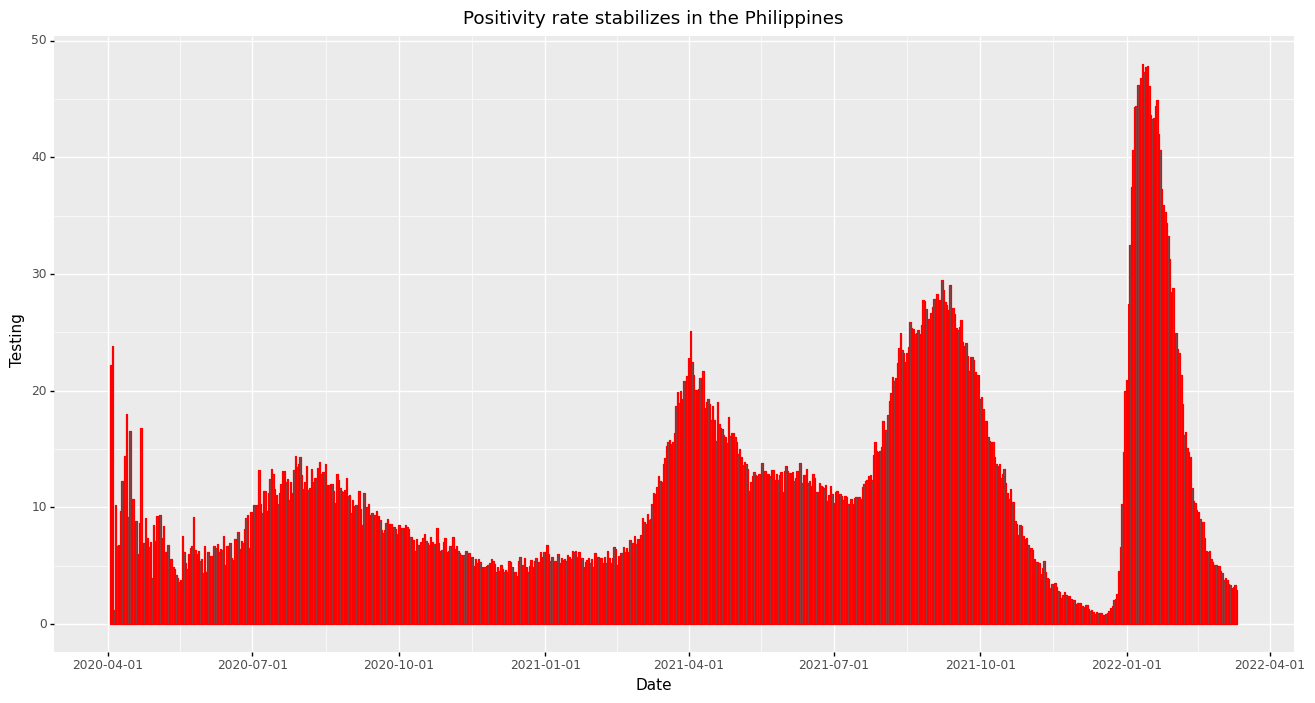

<ggplot: (359270121)>

In [53]:
(
    ggplot(df_pos2, aes('date', 'testing')) +
           geom_col(color="red", stat="identity") +
           theme(figure_size=(16,8)) +
           labs(x= "Date", y="Testing", title="Positivity rate stabilizes in the Philippines")
)

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [54]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [55]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [56]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")